In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pandas as pd
from pyprnt import prnt
import csv
import json
import re

import visualization as vis
import data_manage as dm
import lrlo as lrlo
import warnings

LOG_ROOT = 'data/logs/'
CSV_ROOT = 'data/csvs/'

warnings.filterwarnings("ignore")

In [ ]:
network_config = {
    "abilene" : {
        "node_num" : 11,
        "dest_node" : ["latency: node9", "latency: node10", "latency: node11"],
        "V": "100000",
        # "V": "1000000"
    },
    "abilene_dummy" : {
        "node_num" : 11,
        "dest_node" : ["latency: node9", "latency: node10", "latency: node11"],
        # "V": "10000",
        "V": "50000",
    },
    "yolo" : {
        "node_num" : 4,
        "dest_node" : None,
        "V": "10000000"
    }
}

In [ ]:
#network = "yolo"
# network = "abilene"
network = "abilene"
# dataset = 'JK'
dataset = 'SD'
# dataset = 'JN'

In [ ]:
backlog_path_masking = CSV_ROOT + "/omnet/" + network + "_backlog_masking_" + network_config[network]['V'] + "_" + dataset + ".csv"
latency_path_masking = CSV_ROOT + "/omnet/" + network + "_latency_masking_" + network_config[network]['V'] + "_" + dataset + ".csv"
backlog_path_unmasking = CSV_ROOT + "/omnet/" + network + "_backlog_unmasking" + "_" + dataset + ".csv"
latency_path_unmasking = CSV_ROOT + "/omnet/" + network + "_latency_unmasking" + "_" + dataset + ".csv"

log_dir_train = LOG_ROOT + "train/240318-184226_videopath_JK_rewardmethod_10_importantmethod_021_threshold_0.35"
log_dir_masking = LOG_ROOT + "test/240327-082030_JK-1_240318-184226_reward_10_thresh_0.35_mask_True_agent_3"
log_dir_unmasking = LOG_ROOT + "test/240327-063311_JK-1_240318-184226_reward_10_thresh_0.35_mask_False_agent_3"

barcode_1 = LOG_ROOT + "test/240327-081943_JK-1_240318-184226_reward_10_thresh_0.35_mask_True_agent_1"
barcode_2 = LOG_ROOT + "test/240327-082020_JK-1_240318-184226_reward_10_thresh_0.35_mask_True_agent_2"
barcode_3 = LOG_ROOT + "test/240327-082030_JK-1_240318-184226_reward_10_thresh_0.35_mask_True_agent_3"

In [ ]:
color_list = ["tomato", "salmon", "darkorange", "gold", "forestgreen", "mediumseagreen", "cornflowblue", "royalblue", "steelblue", "slateblue"]

# 1. Plot log Data

### 1. DataLoad

In [ ]:
SKIP = True

In [ ]:
# Fraction change에 사용하는 태그: "Network/send_a(t)", "Network/Fraction"
# F1 change에 사용하는 태그: "F1_score/changes"

tag_list = ["Network/Diff", "Network/send_a(t)", "Network/target_A(t)", "Network/Fraction", "F1_score/changes"]

masking = dm.load_log(log_dir_masking, tag_list)
unmasking = dm.load_log(log_dir_unmasking, tag_list)

### 2. Plot Fraction change: each method

In [ ]:
if network == "yolo":
    lrlo.plot_frame_barcode(masking, color="royalblue")
    lrlo.plot_frame_barcode(unmasking, color="slateblue")

In [ ]:
if not SKIP:
    lrlo.plot_send(masking)
    lrlo.plot_fraction(masking)
    lrlo.plot_send_and_guide(masking)
    lrlo.plot_send_and_guide_as_fraction(masking)
    lrlo.plot_comparison_send([masking, unmasking], ["masking", "unmasking"])
    lrlo.plot_comparison_fraction([masking, unmasking], ["masking", "unmasking"])
    lrlo.plot_diff(masking)
    lrlo.plot_comparison_diff([masking, unmasking], ["masking", "unmasking"])

# 2. Plot OMNeT++ Data

### 1. DataLoad|

In [ ]:
# Load Data
latency_masking = dm.load_csv(latency_path_masking)
latency_masking_df = lrlo.parse_omnet_csv(latency_masking, 'latency', node_list=network_config[network]["dest_node"])
latency_unmasking = dm.load_csv(latency_path_unmasking)
latency_unmasking_df = lrlo.parse_omnet_csv(latency_unmasking, 'latency', node_list=network_config[network]["dest_node"])

backlog_masking = dm.load_csv(backlog_path_masking)
backlog_masking_df = lrlo.parse_omnet_csv(backlog_masking, 'backlog')
backlog_unmasking = dm.load_csv(backlog_path_unmasking)
backlog_unmasking_df = lrlo.parse_omnet_csv(backlog_unmasking, 'backlog')

sum_backlog_masking_df = lrlo.get_backlog_sum(backlog_masking_df)
sum_backlog_unmasking_df = lrlo.get_backlog_sum(backlog_unmasking_df)
avg_backlog_masking_df = lrlo.get_backlog_avg(backlog_masking_df)
avg_backlog_unmasking_df = lrlo.get_backlog_avg(backlog_unmasking_df)
avg_latency_masking_df = lrlo.get_latency_avg(latency_masking_df)
avg_latency_unmasking_df = lrlo.get_latency_avg(latency_unmasking_df)

In [ ]:
if network == 'yolo':
    masking_mean_value = latency_masking_df['node4'].mean()
    print("masking mean value: ", masking_mean_value)
    unmasking_mean_value = latency_unmasking_df['node4'].mean()
    print("unmasking mean value: ", unmasking_mean_value)
    
elif network in ['abilene', 'abilene_dummy']:
    for node in network_config[network]['dest_node']:
        masking_mean_value = latency_masking_df[node].mean()
        print("masking mean value: ", masking_mean_value, "(", node, ")")
        unmasking_mean_value = latency_unmasking_df[node].mean()
        print("unmasking mean value: ", unmasking_mean_value, "(", node, ")")

In [ ]:
# NaN 무시
latency_masking_df = latency_masking_df.ffill()
latency_unmasking_df = latency_unmasking_df.ffill()


avg_latency_masking_df = avg_latency_masking_df.ffill()
avg_latency_unmasking_df = avg_latency_unmasking_df.ffill()

### 2. Unmasking vs Masking PLOT

#### 2-1. backlog sum comparison

In [ ]:
sampled_sum_backlog_masking_df = dm. get_sampled_df(sum_backlog_masking_df, 0.1)
sampled_sum_backlog_unmasking_df = dm.get_sampled_df(sum_backlog_unmasking_df, 0.1)
sns.set_theme(style="white")
width = 1.3

for column in sampled_sum_backlog_masking_df.columns:
    #sns.lineplot(x=latency_masking_df.index, y=latency_masking_df[column], alpha=0.5)
    sns.lineplot(x=sampled_sum_backlog_masking_df.index, y=sampled_sum_backlog_masking_df[column], label='masking', lw=width)
    #sns.lineplot(x=latency_unmasking_df.index, y=latency_unmasking_df[column], alpha=0.5)
    sns.lineplot(x=sampled_sum_backlog_unmasking_df.index, y=sampled_sum_backlog_unmasking_df[column], label='unmasking', lw=width)
    plt.xlabel('times (s)')
    plt.ylabel('backlog (B)')
    plt.show()

#### 2-2. backlog avg comparison

In [ ]:
sampled_avg_backlog_masking_df = dm. get_sampled_df(avg_backlog_masking_df, 0.1)
sampled_avg_backlog_unmasking_df = dm.get_sampled_df(avg_backlog_unmasking_df, 0.1)
sns.set_theme(style="white")
width = 1.3


for column in sampled_avg_backlog_masking_df.columns:
    #sns.lineplot(x=latency_masking_df.index, y=latency_masking_df[column], alpha=0.5)
    sns.lineplot(x=sampled_avg_backlog_masking_df.index, y=sampled_avg_backlog_masking_df[column], label='masking', lw=width)
    #sns.lineplot(x=latency_unmasking_df.index, y=latency_unmasking_df[column], alpha=0.5)
    sns.lineplot(x=sampled_avg_backlog_unmasking_df.index, y=sampled_avg_backlog_unmasking_df[column], label='unmasking', lw=width)
    plt.xlabel('times (s)')
    plt.ylabel('backlog (B)')
    plt.show()

#### 2-3. latency avg comparison

In [ ]:
sampled_avg_latency_masking_df = dm.get_sampled_df(avg_latency_masking_df, 1.5)
sampled_avg_latency_unmasking_df = dm.get_sampled_df(avg_latency_unmasking_df, 1.5)

sns.set_theme(style="white")
width = 1.1

for column in sampled_avg_latency_masking_df.columns:
    #sns.lineplot(x=latency_masking_df.index, y=latency_masking_df[column], alpha=0.5)
    sns.lineplot(x=sampled_avg_latency_masking_df.index, y=sampled_avg_latency_masking_df[column], label='masking', lw=width)
    #sns.lineplot(x=latency_unmasking_df.index, y=latency_unmasking_df[column], alpha=0.5)
    sns.lineplot(x=sampled_avg_latency_unmasking_df.index, y=sampled_avg_latency_unmasking_df[column], label='unmasking', lw=width)
    plt.xlabel('times (s)')
    plt.ylabel('times (s)')
    plt.show()

#### 2-4. latency comparision (*each node)

In [ ]:
sampled_latency_masking_df = dm.get_sampled_df(latency_masking_df, 1.5)
sampled_latency_unmasking_df = dm.get_sampled_df(latency_unmasking_df, 1.5)

sns.set_theme(style="white")
width = 1.1

for column in sampled_latency_masking_df.columns:
    #sns.lineplot(x=latency_masking_df.index, y=latency_masking_df[column], alpha=0.5)
    sns.lineplot(x=sampled_latency_masking_df.index, y=sampled_latency_masking_df[column], label='masking', lw=width)
    #sns.lineplot(x=latency_unmasking_df.index, y=latency_unmasking_df[column], alpha=0.5)
    sns.lineplot(x=sampled_latency_unmasking_df.index, y=sampled_latency_unmasking_df[column], label='unmasking', lw=width)
    plt.xlabel('times (s)')
    plt.ylabel('times (s)')
    plt.show()

# 3. Experiment Data

In [ ]:
data_dir = 'data/csvs/experiment/data/'
dataset = ['SD', 'JK', 'JN']

In [ ]:

def extract_value_from_latency(value_str):
    return float(value_str.split('ms')[0].strip())

def get_latency_exp(csv_path):
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        df['latency'] = df['latency'].apply(extract_value_from_latency)
        return df
        
def get_backlog_exp(csv_path):
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        return df[['sum', 'avg']]

### 1. Read CSV

In [ ]:
mean_latency_list = []
latency_df = {}
backlog_df = {}

for data in dataset:
    folder_path = os.path.join(data_dir, data)
    latency_df[data] = {}
    backlog_df[data] = {}
    for root, dirs, files in os.walk(folder_path):
        for directory in dirs:
            if directory == 'latency':
                name = re.split(r"[/\\]",root)[-1]
                prefix = name.split("_")[0] + "_" + name.split("_")[1]
                csv_path = os.path.join(root, directory, 'test job 1.csv')
                if prefix in latency_df[data]:
                    continue
                latency_df[data][prefix]= get_latency_exp(csv_path)
                mean_latency = calculate_mean_latency(latency_df[data][prefix])
                mean_latency_list.append([data+"_"+prefix, str(mean_latency)])
            elif directory == 'backlog':
                name = re.split(r"[/\\]",root)[-1]
                prefix = name.split("_")[0] + "_" + name.split("_")[1]
                csv_path = os.path.join(root, directory, 'total_backlog.csv')
                if prefix in latency_df[data]:
                    continue
                backlog_df[data][prefix] = get_backlog_exp(csv_path)

# prnt(latency_df)
    
with open("data/csvs/experiment/mean_latency.csv", "w",  newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(mean_latency_list)

### 2. Draw Time Varing Change

In [ ]:
columns = ['avg', 'sum']
for data in dataset:
    data_df = backlog_df[data]
    for column in columns:
        print(column)
        for key, df in data_df.items():
            # x_values = np.arange(0, len(df) * 0.1, 0.1)
            df.reindex(np.arange(0, len(df) * 0.1, 0.1))
            sampled_df = dm.get_sampled_df(df, 1.5)
            #x_values = np.arange(0, len(sampled_df) * 0.1, 0.1)
            #sns.lineplot(x=latency_masking_df.index, y=latency_masking_df[column], alpha=0.5)
            sns.lineplot(x=sampled_df.index, y=sampled_df[column], label=key, lw=width)
            #sns.lineplot(x=latency_unmasking_df.index, y=latency_unmasking_df[column], alpha=0.5)
        print("dataset", data)
        plt.xlabel('times (s)')
        plt.ylabel('backlog (B)')
        plt.show()

In [ ]:
for data in dataset:
    data_df = latency_df[data]
    for key, df in data_df.items():
        # sampled_df = dm.get_sampled_df(df, 1.5)
        #x_values = np.arange(0, len(sampled_df) * 0.1, 0.1)
        #sns.lineplot(x=latency_masking_df.index, y=latency_masking_df[column], alpha=0.5)
        sns.lineplot(x=df.index, y=df['latency'], label=key, lw=width)
        #sns.lineplot(x=latency_unmasking_df.index, y=latency_unmasking_df[column], alpha=0.5)
    print("dataset", data)
    plt.xlabel('times (s)')
    plt.ylabel('times (s)')
    plt.show()

# ***** Make Figure (진) *****

준비물:

_!data, method, F1_score, fraction, latency_
- model_performance.csv
- experiment/collective_result.csv
    - experiment/mean_latency.csv    <- mean latency를 기록
    - experiment/text_exp_result.csv <- FrameHopper에서 결과 만들어서 가져오기
- omnet/collective_result.csv

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pandas as pd
from pyprnt import prnt
import csv
import json
import re

import visualization as vis
import data_manage as dm
import lrlo as lrlo
import warnings

LOG_ROOT = 'data/logs/'
CSV_ROOT = 'data/csvs/'

warnings.filterwarnings("ignore")

SAVE_ROOT = 'figure/' 
idx = 0

In [3]:
# make_collective_result
sim_df = pd.read_csv('data/csvs/omnet/collective_result.csv', skipinitialspace=True)
sim_latency_df = pd.read_csv('data/csvs/omnet/mean_latency.csv', skipinitialspace=True)

In [4]:
import warnings

LOG_ROOT = 'data/logs/'
CSV_ROOT = 'data/csvs/'

warnings.filterwarnings("ignore")

In [5]:

def extract_value_from_latency(value_str):
    return float(value_str.split('ms')[0].strip())

def get_latency_exp(csv_path):
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        df['latency'] = df['latency'].apply(extract_value_from_latency)
        return df
        
def get_backlog_exp(csv_path):
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        return df[['sum', 'avg']]
    
def calculate_mean_latency(df):
    mean_value = df['latency'].mean()
    return mean_value


In [6]:
omnet_dir = CSV_ROOT + "omnet/"
omnet_config_list = ['abilene', 'yolo', 'abilene_dummy']
omnet_network = {
    "abilene" : {
        "node_num" : 11,
        "dataset" : ['JK', 'SD'],
        "dest_node" : ["latency: node9", "latency: node10", "latency: node11"],
        "V": "100000",
        # "V": "1000000"
    },
    "abilene_dummy" : {
        "node_num" : 11,
        "dataset" : ['JK'],
        "dest_node" : ["latency: node9", "latency: node10", "latency: node11"],
        # "V": "10000",
        "V": "50000",
    },
    "yolo" : {
        "node_num" : 4,
        "dataset" : ['JN'],
        "dest_node" : None,
        "V": "70000000"
    }
}

In [94]:
# Calculate mean latency & save
mean_latency_data = []

for config in omnet_config_list:
    for data in omnet_network[config]['dataset']:
        latency_path_masking = omnet_dir + config + "/" + config + "_latency_masking_" + omnet_network[config]['V'] + "_" + data + ".csv"
        latency_masking_df = dm.load_csv(latency_path_masking)
        latency_masking_df = lrlo.parse_omnet_csv(latency_masking_df, 'latency', node_list=omnet_network[config]["dest_node"])
        latency_path_unmasking = omnet_dir + config + "/" + config + "_latency_unmasking_" + data + ".csv"
        latency_unmasking_df = dm.load_csv(latency_path_unmasking)
        latency_unmasking_df = lrlo.parse_omnet_csv(latency_unmasking_df, 'latency', node_list=omnet_network[config]["dest_node"])
        
        if config == 'yolo':
            #masking_mean_value = latency_masking_df['node4'].mean()
            dm.df_info(latency_masking_df)
            print(latency_masking_df.columns)
            masking_mean_value = latency_masking_df['latency: node4'].mean()
            mean_latency_data.append([config, 'masking', data, 'node4', masking_mean_value])
            unmasking_mean_value = latency_unmasking_df['latency: node4'].mean()
            #unmasking_mean_value = latency_unmasking_df['latency: node4'].mean()
            mean_latency_data.append([config, 'unmasking', data, 'node4', unmasking_mean_value])
            
        
        elif config in ['abilene', 'abilene_dummy']:
            for node in omnet_network[config]['dest_node']:
                masking_mean_value = latency_masking_df[node].mean()
                mean_latency_data.append([config, 'masking', data, node.split(":")[-1], masking_mean_value])
                unmasking_mean_value = latency_unmasking_df[node].mean()
                mean_latency_data.append([config, 'unmasking', data, node.split(":")[-1], unmasking_mean_value])
                
        #avg_latency_masking_df = lrlo.get_latency_avg(latency_masking_df)
        #avg_latency_unmasking_df = lrlo.get_latency_avg(latency_unmasking_df)


with open('data/csvs/omnet/mean_latency.csv', 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['network', 'method', 'data', 'dest_node', 'latency'] )  
    writer.writerows(mean_latency_data)

DataFrame Info:
✲ Shape: (596, 1)
✲ Columns:
Index(['latency: node4'], dtype='object', name='name')

✲ Data Types:
name
latency: node4    float64
dtype: object

✲Non-null Value Counts:
name
latency: node4    596
dtype: int64

DataFrame HEAD:
--------------------------------------------------


name,latency: node4
vectime,
0.666100,0.532767
0.719226,0.619226
1.174092,0.873726
1.337916,0.769998
1.682079,0.979157


Index(['latency: node4'], dtype='object', name='name')


In [95]:
# Load backlog data
backlog_path_masking = omnet_dir + "yolo/yolo_backlog_masking_" + omnet_network['yolo']['V'] + "_" + omnet_network['yolo']['dataset'][0] + ".csv"
backlog_path_unmasking = omnet_dir + "yolo/yolo_backlog_unmasking_" + omnet_network['yolo']['dataset'][0] + ".csv"

backlog_masking_df = dm.load_csv(backlog_path_masking)
backlog_masking_df = lrlo.parse_omnet_csv(backlog_masking_df, 'backlog')
backlog_unmasking_df = dm.load_csv(backlog_path_unmasking)
backlog_unmasking_df = lrlo.parse_omnet_csv(backlog_unmasking_df, 'backlog')

sum_backlog_masking_df = lrlo.get_backlog_sum(backlog_masking_df)
sum_backlog_unmasking_df = lrlo.get_backlog_sum(backlog_unmasking_df)
avg_backlog_masking_df = lrlo.get_backlog_avg(backlog_masking_df)
avg_backlog_unmasking_df = lrlo.get_backlog_avg(backlog_unmasking_df)

sum_backlog_masking_df = sum_backlog_masking_df.ffill()
sum_backlog_unmasking_df = sum_backlog_unmasking_df.ffill()
avg_backlog_masking_df = avg_backlog_masking_df.ffill()
avg_backlog_unmasking_df = avg_backlog_unmasking_df.ffill()

In [96]:
def transform_axis(x):
    return x * 100

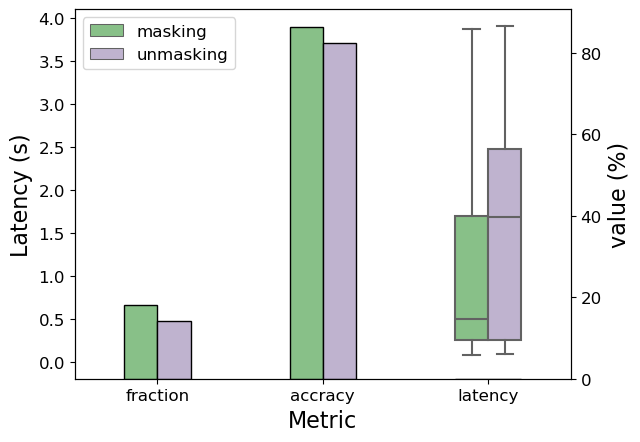

In [97]:
latency_path_masking = omnet_dir + "abilene_dummy/abilene_dummy_latency_masking_" + omnet_network['abilene_dummy']['V'] + "_JK.csv"
latency_masking_df = dm.load_csv(latency_path_masking)
latency_masking_df = lrlo.parse_omnet_csv(latency_masking_df, 'latency', node_list=omnet_network['abilene_dummy']["dest_node"])
latency_path_unmasking = omnet_dir + "abilene_dummy/abilene_dummy_latency_unmasking_JK.csv"
latency_unmasking_df = dm.load_csv(latency_path_unmasking)
latency_unmasking_df = lrlo.parse_omnet_csv(latency_unmasking_df, 'latency', node_list=omnet_network['abilene_dummy']["dest_node"])
node_masking_df = latency_masking_df[['latency: node9']]
node_unmasking_df = latency_unmasking_df[['latency: node9']]
node_masking_df['method'] = 'masking'
node_unmasking_df['method'] = 'unmasking'
node_masking_df = node_masking_df.rename(columns={'latency: node9': 'Value'})
node_unmasking_df = node_unmasking_df.rename(columns={'latency: node9': 'Value'})

latency_df = pd.concat([node_masking_df, node_unmasking_df], ignore_index=False)
latency_df['Metric'] = 'latency'
new_rows = [{'Metric': 'fraction', 'Value': 0, 'method': 'masking'},
            {'Metric': 'fraction', 'Value': 0, 'method': 'unmasking'},
            {'Metric': 'accuracy', 'Value': 0, 'method': 'masking'},
            {'Metric': 'accuracy', 'Value': 0, 'method': 'unmasking'}]
latency_df = pd.concat([pd.DataFrame(new_rows), latency_df], ignore_index=True)
ax = sns.boxplot(x='Metric', y='Value', hue='method', data=latency_df, palette='Accent', width=0.4, showfliers=False)
plt.xlabel("Metric", fontsize=16)
plt.ylabel("Latency (s)", fontsize=16)  # 폰트 크기 지정

sim_dummy_df = sim_df[sim_df['network'] == 'abilene-dummy']
sim_df_stack = sim_dummy_df.melt(id_vars=['method', 'network'], value_vars=['fraction', 'accracy'], var_name='Metric', value_name='Value')
new_rows = [{'Metric': 'latency', 'Value': 0, 'method': 'masking'},
            {'Metric': 'latency', 'Value': 0, 'method': 'unmasking'},]
sim_df_stack = pd.concat([sim_df_stack, pd.DataFrame(new_rows)], ignore_index=True)
#plt.figure(figsize=(4,5))

ax.tick_params(labelsize=12) 
ax2 = ax.twinx()
ax2 = sns.barplot(x='Metric', y='Value', hue='method', data=sim_df_stack, palette='Accent', ci=None, width=0.4, edgecolor='0')
ax2.legend().remove()
ax2.tick_params(labelsize=12) 
plt.xlabel("Metric", fontsize=16)  # 폰트 크기 지정
plt.ylabel("value (%)", fontsize=16) 

ax.legend(loc='upper left', fontsize=12) 

plt.savefig(SAVE_ROOT+"dummy_performance.pdf", bbox_inches='tight', pad_inches=0)

plt.show()


# sim_df_stack = sim_dummy_df.melt(id_vars=['method', 'network'], value_vars=['latency'], var_name='Metric', value_name='Value')
# plt.figure(figsize=(2,5))
# ax = sns.barplot(x='Metric', y='Value', hue='method', data=sim_df_stack, palette='Accent', ci=None, width=0.4)
# ax.set_ylabel('times (s)')
# ax.legend().remove()
# plt.savefig(SAVE_ROOT+"dummy_performance_2.pdf",  bbox_inches='tight', pad_inches=0)
#plt.show()


JK


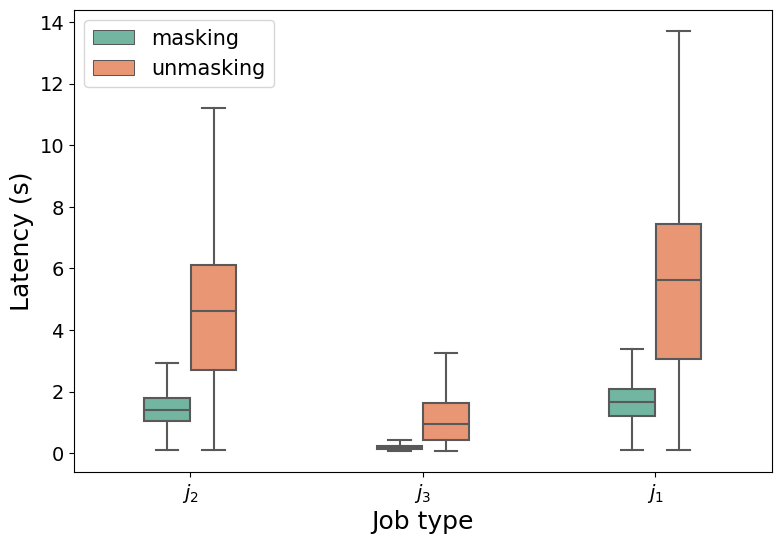

SD


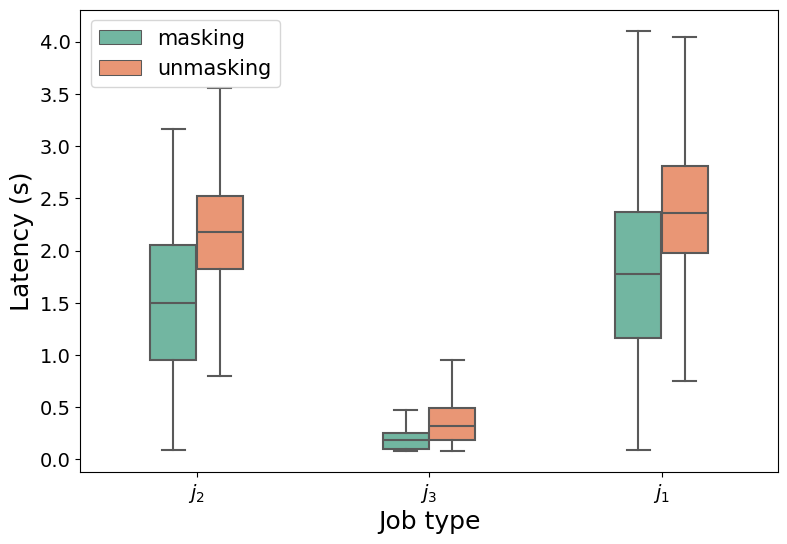

JN


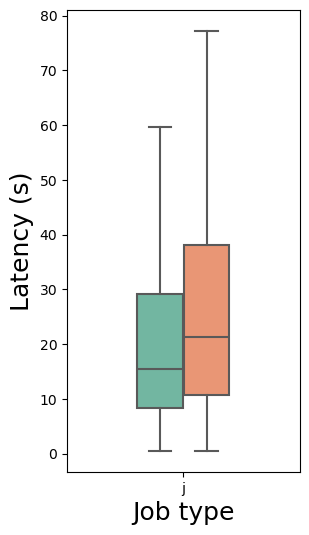

JK


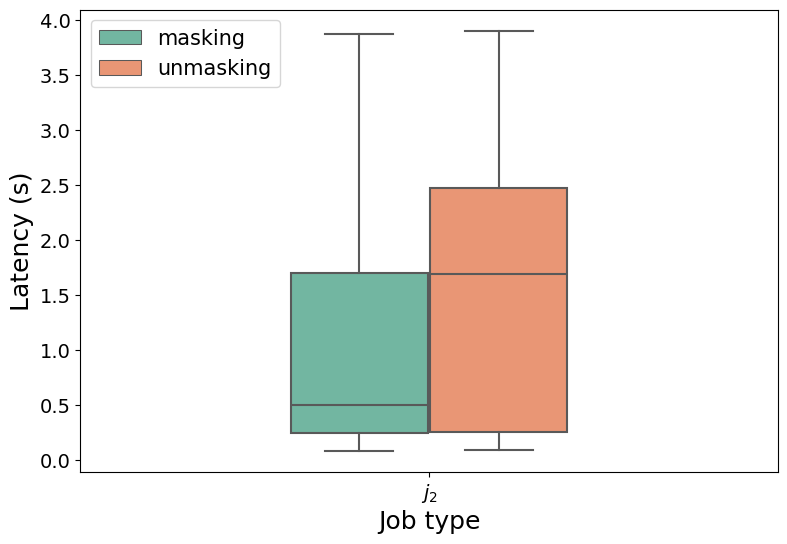

In [98]:
matching = {
    ' node9': r"$j_2$",
    ' node10': r"$j_3$",
    ' node11': r"$j_1$",
    ' node4': "j"
}

for config in omnet_config_list:
    for data in omnet_network[config]['dataset']:
        print(data)
        latency_path_masking = omnet_dir + config + "/" + config + "_latency_masking_" + omnet_network[config]['V'] + "_" + data + ".csv"
        latency_masking_df = dm.load_csv(latency_path_masking)
        latency_masking_df = lrlo.parse_omnet_csv(latency_masking_df, 'latency', node_list=omnet_network[config]["dest_node"])
        latency_path_unmasking = omnet_dir + config + "/" + config + "_latency_unmasking_" + data + ".csv"
        latency_unmasking_df = dm.load_csv(latency_path_unmasking)
        latency_unmasking_df = lrlo.parse_omnet_csv(latency_unmasking_df, 'latency', node_list=omnet_network[config]["dest_node"])
        latency_masking_df['method'] = 'masking'
        latency_unmasking_df['method'] = 'unmasking'
        
        if config == 'yolo':
            masking_mean_value = latency_masking_df['latency: node4'].mean()
            mean_latency_data.append([config, 'masking', data, 'latency: node4', masking_mean_value])
            unmasking_mean_value = latency_unmasking_df['latency: node4'].mean()
            mean_latency_data.append([config, 'unmasking', data, 'latency: node4', unmasking_mean_value])
            latency_df = pd.concat([latency_masking_df, latency_unmasking_df], ignore_index=False)
            latency_df = latency_df.rename(columns={'latency: node4': 'latency'})
            latency_df['job type'] = "j"
        
        elif config =='abilene_dummy':
            node_masking_df = latency_masking_df[['latency: node9']]
            node_unmasking_df = latency_unmasking_df[['latency: node9']]
            node_masking_df['job type'] = r"$j_2$"
            node_unmasking_df['job type'] = r"$j_2$"
            node_masking_df['method'] = 'masking'
            node_unmasking_df['method'] = 'unmasking'
            node_masking_df = node_masking_df.rename(columns={'latency: node9': 'latency'})
            node_unmasking_df = node_unmasking_df.rename(columns={'latency: node9': 'latency'})
            masking_mean_value = latency_masking_df[node].mean()
            mean_latency_data.append([config, 'masking', data, matching[node.split(":")[-1]], masking_mean_value])
            unmasking_mean_value = latency_unmasking_df[node].mean()
            mean_latency_data.append([config, 'unmasking', data, matching[node.split(":")[-1]], unmasking_mean_value])
            
            latency_df = pd.concat([node_masking_df, node_unmasking_df], ignore_index=False)
        
        elif config == 'abilene':
            latency_df_list = []
            for node in omnet_network[config]['dest_node']:
                node_masking_df = latency_masking_df[[node]]
                node_unmasking_df = latency_unmasking_df[[node]]
                node_masking_df['job type'] = matching[node.split(":")[-1]]
                node_unmasking_df['job type'] = matching[node.split(":")[-1]]
                node_masking_df['method'] = 'masking'
                node_unmasking_df['method'] = 'unmasking'
                node_masking_df = node_masking_df.rename(columns={node: 'latency'})
                node_unmasking_df = node_unmasking_df.rename(columns={node: 'latency'})
                masking_mean_value = latency_masking_df[node].mean()
                mean_latency_data.append([config, 'masking', data, matching[node.split(":")[-1]], masking_mean_value])
                unmasking_mean_value = latency_unmasking_df[node].mean()
                mean_latency_data.append([config, 'unmasking', data, matching[node.split(":")[-1]], unmasking_mean_value])
                
                latency_node_df = pd.concat([node_masking_df, node_unmasking_df], ignore_index=False)
                latency_df_list.append(latency_node_df)
                
            
            latency_df = pd.concat(latency_df_list, ignore_index=False)

        
        if config == 'yolo':
            plt.figure(figsize=(3, 6))
            ax = sns.boxplot(x='job type', y='latency', hue='method', data=latency_df, width=0.4, palette='Set2', showfliers=False)
            plt.xlabel("Job type", fontsize=18)  # 폰트 크기 지정
            plt.ylabel("Latency (s)", fontsize=18)  # 폰트 크기 지정
            ax.legend().remove()
        else:    
            plt.figure(figsize=(9, 6))
            ax = sns.boxplot(x='job type', y='latency', hue='method', data=latency_df, width=0.4, palette='Set2', showfliers=False)
            ax.tick_params(labelsize=14) 
            plt.xlabel("Job type", fontsize=18)  # 폰트 크기 지정
            plt.ylabel("Latency (s)", fontsize=18)  # 폰트 크기 지정
            ax.legend(loc='upper left', fontsize=15) 
        
        if data == 'JK' and config == 'abilene':
            plt.savefig(SAVE_ROOT+"sim_latency_abilene.pdf", bbox_inches='tight', pad_inches=0)
        elif config == 'yolo':
            plt.savefig(SAVE_ROOT+"sim_latency_yolo.pdf", bbox_inches='tight', pad_inches=0)
        plt.show()
                

In [ ]:
# sim_latency_df['latency'] = sim_latency_df['latency'].round(2)
# networks = sim_latency_df['network'].unique()
# for network in networks:
#     network_df = sim_latency_df[sim_latency_df['network'] == network]
#     if network == 'abilene_dummy':
#         continue
    
#     if network != "abilene":
#         plt.figure(figsize=(2,4))
#         ax = sns.boxplot(x='dest_node', y='latency', hue='method', data=network_df, width=0.4, palette='Set2')
#         ax.legend().remove()
#     else:
#         plt.figure(figsize=(6,4))
#         ax = sns.boxplot(x='dest_node', y='latency', hue='method', data=network_df, width=0.4, palette='Set2')
#         legend = ax.legend()
#         #for text in legend.get_texts():
#         #    text.set_fontsize(14)
#     #ax.bar_label(ax.containers[0], fontsize=12);
#     #ax.bar_label(ax.containers[1], fontsize=12);
#     plt.setp(ax.patches, linewidth=0)
#     plt.xlabel('dest node')
#     plt.ylabel('latency (s)')
#     plt.xticks(rotation=0, ha='center')
#     plt.tight_layout()
#     plt.savefig(SAVE_ROOT+"sim_latency_"+network+".pdf",  bbox_inches='tight', pad_inches=0)
#     plt.show()


virtual backlog


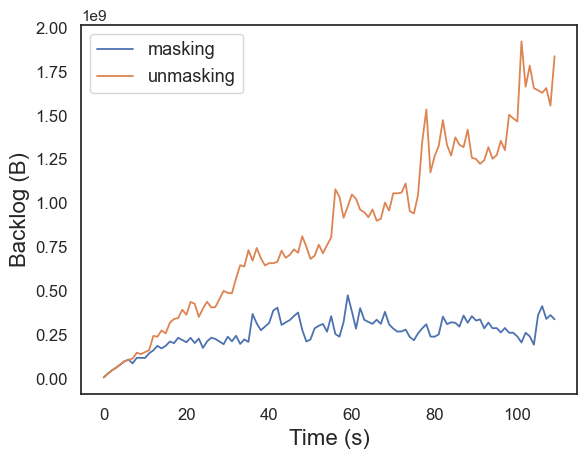

physical backlog


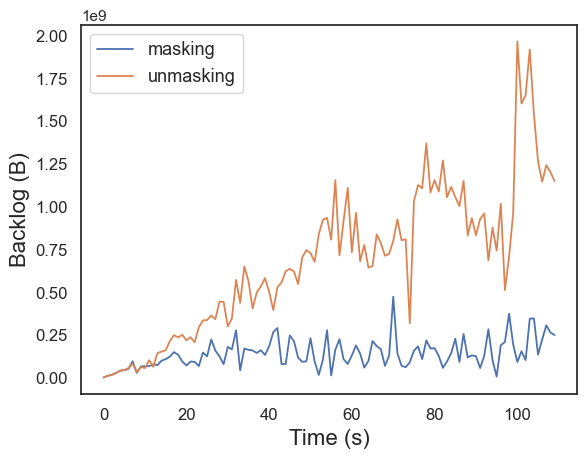

In [105]:
sampled_sum_backlog_masking_df = dm. get_sampled_df(sum_backlog_masking_df, 0.3)
sampled_sum_backlog_unmasking_df = dm.get_sampled_df(sum_backlog_unmasking_df, 0.3)
sns.set_theme(style="white")
width = 1.3

for column in sampled_sum_backlog_masking_df.columns:
    print(column)
    #sns.lineplot(x=sum_backlog_masking_df.index, y=sum_backlog_masking_df[column], alpha=0.5)
    sns.lineplot(x=sampled_sum_backlog_masking_df.index, y=sampled_sum_backlog_masking_df[column], label='masking', lw=width)
    #ns.lineplot(x=sum_backlog_unmasking_df.index, y=sum_backlog_unmasking_df[column], alpha=0.5)
    sns.lineplot(x=sampled_sum_backlog_unmasking_df.index, y=sampled_sum_backlog_unmasking_df[column], label='unmasking', lw=width)
    plt.xlabel('Time (s)', fontsize=16)  
    plt.ylabel('Backlog (B)', fontsize=16) 
    plt.tick_params(labelsize=12) 
    plt.legend(loc='upper left', fontsize=13) 
    plt.savefig(SAVE_ROOT+"sim_sum_"+column+".pdf",  bbox_inches='tight', pad_inches=0)
    plt.show()


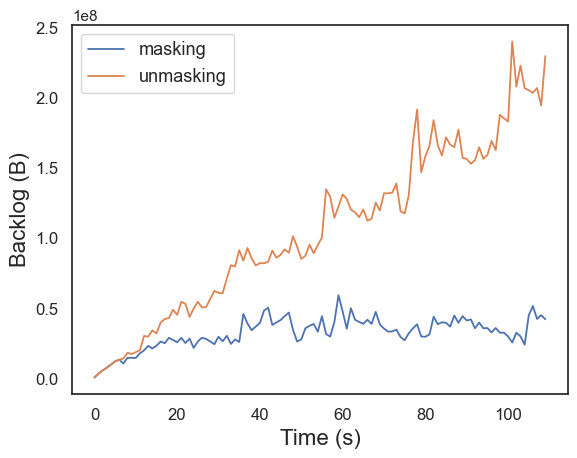

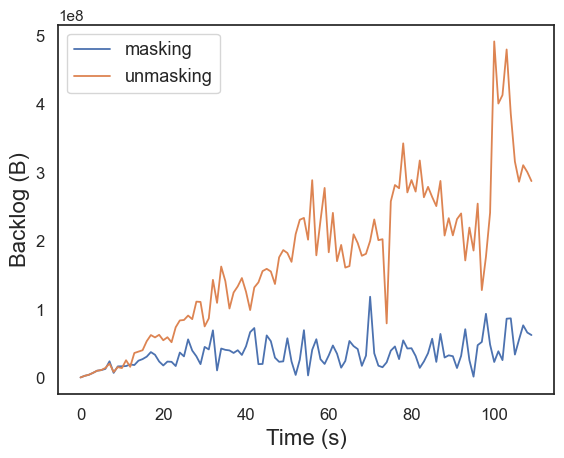

In [104]:
sampled_avg_backlog_masking_df = dm. get_sampled_df(avg_backlog_masking_df, 0.3)
sampled_avg_backlog_unmasking_df = dm.get_sampled_df(avg_backlog_unmasking_df, 0.3)
sns.set_theme(style="white")
width = 1.3


for column in sampled_avg_backlog_masking_df.columns:
    #sns.lineplot(x=latency_masking_df.index, y=latency_masking_df[column], alpha=0.5)
    sns.lineplot(x=sampled_avg_backlog_masking_df.index, y=sampled_avg_backlog_masking_df[column], label='masking', lw=width)
    #sns.lineplot(x=latency_unmasking_df.index, y=latency_unmasking_df[column], alpha=0.5)
    sns.lineplot(x=sampled_avg_backlog_unmasking_df.index, y=sampled_avg_backlog_unmasking_df[column], label='unmasking', lw=width)
    plt.xlabel('Time (s)', fontsize=16)  
    plt.ylabel('Backlog (B)', fontsize=16) 
    plt.tick_params(labelsize=12) 
    plt.legend(loc='upper left', fontsize=13) 
    plt.savefig(SAVE_ROOT+"sim_avg_"+column+".pdf",  bbox_inches='tight', pad_inches=0)
    plt.show()


In [11]:
dummy_masking_log_path = LOG_ROOT + "test/240407-225725_JK_mask_True_abilene_dummy_agent_2"
dummy_unmasking_log_path = LOG_ROOT + "test/240408-215145_JK_mask_False_abilene_dummy_agent_5"
#barcode/
masking_log_path = LOG_ROOT + "test/240402-223316_JN_mask_True_yolo"
unmasking_log_path = LOG_ROOT + "test/240403-070220_JN_mask_False_yolo"


In [12]:
tag_list = ["Network/send_a(t)", "Network/target_A(t)"]

dummy_masking = dm.load_log(dummy_masking_log_path, tag_list)
dummy_unmasking = dm.load_log(dummy_unmasking_log_path, tag_list)
barcode_masking = dm.load_log(masking_log_path, tag_list)
barcode_unmasking = dm.load_log(unmasking_log_path, tag_list)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [13]:
def plot_frame_barcode(df, masking, color="red", save=False, save_path=None):
    extracted_df =dm.extract_column_from_df(df, ["Network/send_a(t)"])
    action_df = dm.revise_df(extracted_df, 'subtract', column="Network/send_a(t)", value=5, prior_value=True)
    make_barcode(action_df, len(action_df)*5, color=color, masking=masking)
    

def make_barcode(skip_list, num_frame, masking, color='red', fps=5) :
    """Make barcode figrue. (white is skip_frame)
    Args
        skip_list (pd.DataFrame)
    """
    print(num_frame)
    squares = [1] * num_frame
    idx = 0
    for s in skip_list.squeeze().values.tolist():
        for i in range(int(s)):
            if idx + i >= num_frame:
                break
            squares[idx + i] = 0
        idx += fps

    unit = num_frame // 150
    plt.figure(figsize=(80, 5))
    
    for i in range(num_frame//3):
        if squares[i] == 1:
            plt.bar(i, 1, color=color)

    plt.axis([0, num_frame//3, 0, 1])

    plt.xticks([])
    plt.yticks([])
    
    if masking:
        plt.savefig(SAVE_ROOT+"barcode_masking.pdf",  bbox_inches='tight', pad_inches=0)
        plt.show()
    else:
        plt.savefig(SAVE_ROOT+"barcode_unmasking.pdf",  bbox_inches='tight', pad_inches=0)
        plt.show()


In [14]:
#dm.df_info(barcode_masking)

#plot_frame_barcode(barcode_masking, color="royalblue", masking=True)
#plot_frame_barcode(barcode_unmasking, color="slateblue", masking=False)

In [15]:
dummy_masking_modify = pd.DataFrame()
dummy_masking_modify['admitted'] = dummy_masking["Network/send_a(t)"].groupby(dummy_masking.index // 6).sum()
dummy_masking_modify['guide'] = dummy_masking["Network/target_A(t)"].groupby(dummy_masking.index // 6).sum()

dummy_unmasking_modify = pd.DataFrame()
dummy_unmasking_modify['admitted'] = dummy_unmasking["Network/send_a(t)"].groupby(dummy_unmasking.index // 2).sum()
dummy_unmasking_modify['guide'] = dummy_unmasking["Network/target_A(t)"].groupby(dummy_unmasking.index // 2).sum()


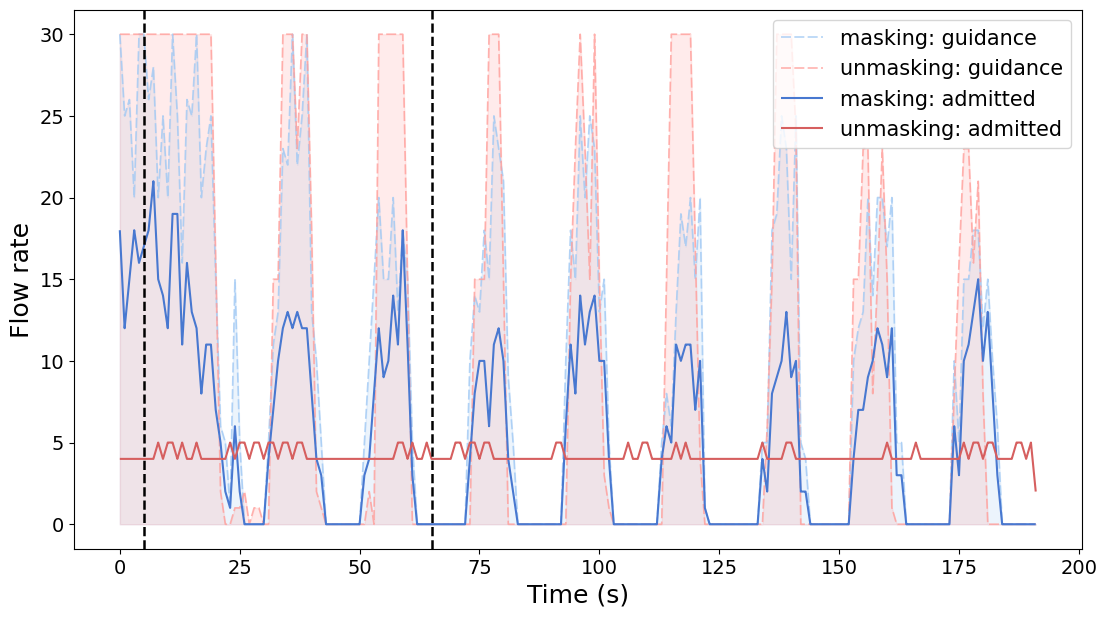

In [16]:
plt.figure(figsize=(13, 7))
palette = sns.color_palette("muted")
palette_2 = sns.color_palette("pastel")
sns.lineplot(data=dummy_masking_modify, x=dummy_masking_modify.index, y='guide', dashes=[6, 2], color=palette_2[0], label='masking: guidance', alpha=0.8, lw=1.2)
sns.lineplot(data=dummy_unmasking_modify, x=dummy_unmasking_modify.index, y='guide', dashes=[6, 2], color=palette_2[3], label='unmasking: guidance', alpha=0.8, lw=1.2)
plt.fill_between(dummy_masking_modify.index, dummy_masking_modify['guide'], color=palette_2[0], alpha=0.2)
plt.fill_between(dummy_unmasking_modify.index, dummy_unmasking_modify['guide'], color=palette_2[3], alpha=0.2)
sns.lineplot(data=dummy_masking_modify, x=dummy_masking_modify.index, y='admitted', dashes=[1, 0], color=palette[0], label='masking: admitted')
sns.lineplot(data=dummy_unmasking_modify, x=dummy_unmasking_modify.index, y='admitted', dashes=[1, 0], color=palette[3], label='unmasking: admitted')

plt.xlabel('Time (s)', fontsize=18)  
plt.ylabel('Flow rate', fontsize=18) 
plt.tick_params(labelsize=14) 
plt.legend(loc='upper right', fontsize=15)

# y축에 25초와 5초에 해당하는 값의 점선을 그립니다.
plt.axvline(x=65, color='black', linestyle='--', lw=1.8)
plt.axvline(x=5, color='black', linestyle='--', lw=1.8)

plt.savefig(SAVE_ROOT+"dynamic_adaptation_ver2.pdf",  bbox_inches='tight', pad_inches=0)
plt.show()


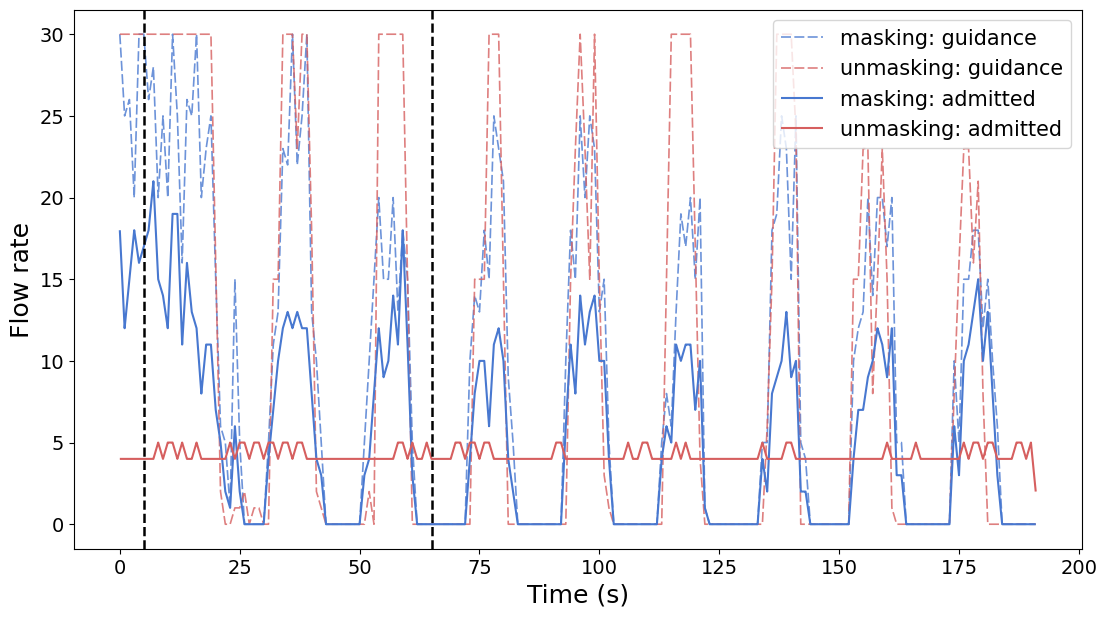

In [18]:
plt.figure(figsize=(13, 7))
palette = sns.color_palette("muted")
palette_2 = sns.color_palette("pastel")
sns.lineplot(data=dummy_masking_modify, x=dummy_masking_modify.index, y='guide', dashes=[6, 2], color=palette[0], label='masking: guidance', alpha=0.8, lw=1.2)
sns.lineplot(data=dummy_unmasking_modify, x=dummy_unmasking_modify.index, y='guide', dashes=[6, 2], color=palette[3], label='unmasking: guidance', alpha=0.8, lw=1.2)
sns.lineplot(data=dummy_masking_modify, x=dummy_masking_modify.index, y='admitted', dashes=[1, 0], color=palette[0], label='masking: admitted')
sns.lineplot(data=dummy_unmasking_modify, x=dummy_unmasking_modify.index, y='admitted', dashes=[1, 0], color=palette[3], label='unmasking: admitted')

plt.xlabel('Time (s)', fontsize=18)  
plt.ylabel('Flow rate', fontsize=18) 
plt.tick_params(labelsize=14) 
plt.legend(loc='upper right', fontsize=15)

# y축에 25초와 5초에 해당하는 값의 점선을 그립니다.
plt.axvline(x=65, color='black', linestyle='--', lw=1.8)
plt.axvline(x=5, color='black', linestyle='--', lw=1.8)

plt.savefig(SAVE_ROOT+"dynamic_adaptation_ver3.pdf",  bbox_inches='tight', pad_inches=0)
plt.show()


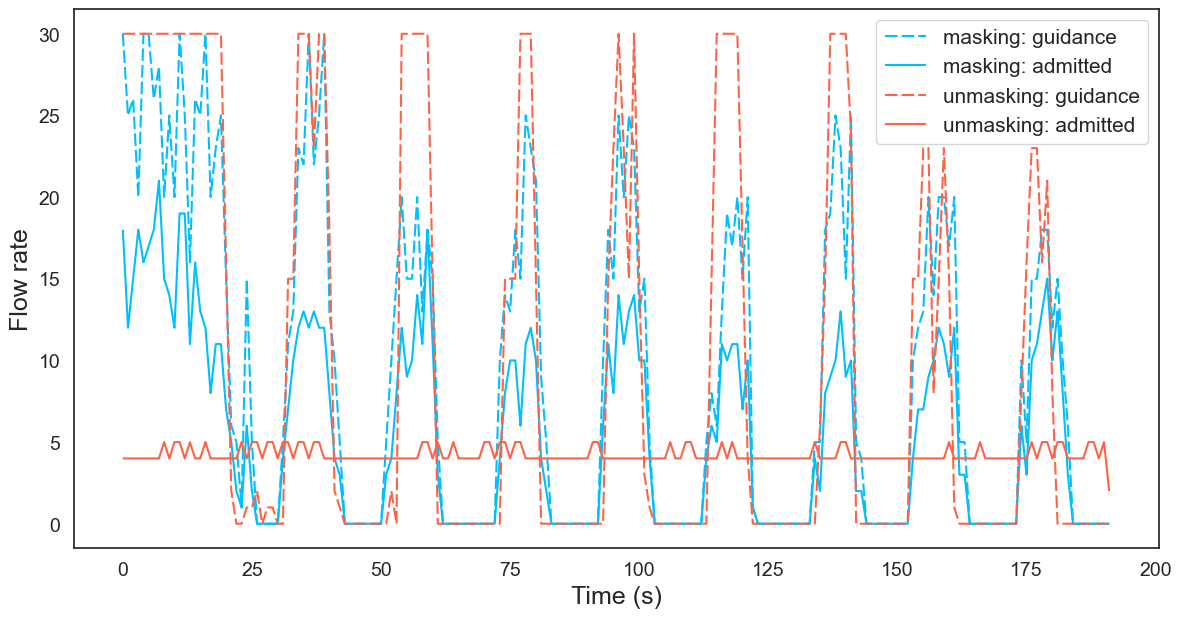

In [166]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=dummy_masking_modify, x=dummy_masking_modify.index, y='guide', dashes=[6, 2], color='deepskyblue', label='masking: guidance')
sns.lineplot(data=dummy_masking_modify, x=dummy_masking_modify.index, y='admitted', dashes=[1, 0], color='deepskyblue', label='masking: admitted')
sns.lineplot(data=dummy_unmasking_modify, x=dummy_unmasking_modify.index, y='guide', dashes=[6, 2], color='tomato', label='unmasking: guidance')
sns.lineplot(data=dummy_unmasking_modify, x=dummy_unmasking_modify.index, y='admitted', dashes=[1, 0], color='tomato', label='unmasking: admitted')
plt.xlabel('Time (s)', fontsize=18)  
plt.ylabel('Flow rate', fontsize=18) 
plt.tick_params(labelsize=14) 
plt.legend(loc='upper right', fontsize=15)
plt.savefig(SAVE_ROOT+"dynamic_adaptation.pdf",  bbox_inches='tight', pad_inches=0)
plt.show()


In [20]:
exp_df = pd.read_csv('data/csvs/experiment/collective_result.csv', skipinitialspace=True)
exp_df = dm.revise_df(exp_df, 'divide', 'latency', 1000)

DataFrame Info:
✲ Shape: (45, 4)
✲ Columns:
Index(['method', 'data', 'Metric', 'Value'], dtype='object')

✲ Data Types:
method     object
data       object
Metric     object
Value     float64
dtype: object

✲Non-null Value Counts:
method    45
data      45
Metric    45
Value     45
dtype: int64

DataFrame HEAD:
--------------------------------------------------


,method,data,Metric,Value
0,frameHopper_0.7,JK,fraction,11.210000
1,frameHopper_0.9,JK,fraction,25.940000
2,reducto_0.7,JK,fraction,19.345239
3,reducto_0.9,JK,fraction,46.939483
4,lrlo,JK,fraction,11.314186
5,frameHopper_0.7,SD,fraction,24.950000
6,frameHopper_0.9,SD,fraction,52.260000
7,reducto_0.7,SD,fraction,24.575706
8,reducto_0.9,SD,fraction,48.258010
9,lrlo,SD,fraction,11.275143


AttributeError: 'Axes' object has no attribute 'xlabel'

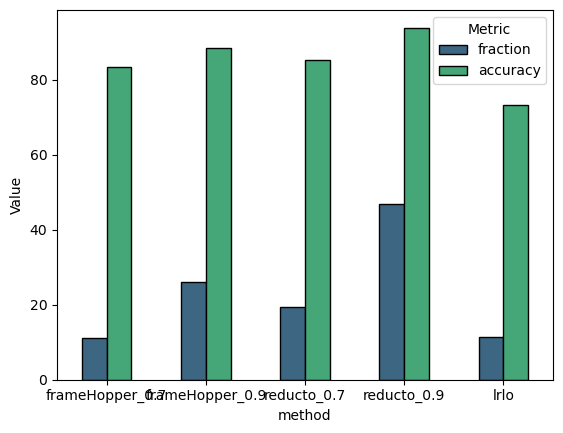

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

datas = ['JK', 'SD', 'JN']
exp_df_stack = exp_df.melt(id_vars=['method', 'data'], value_vars=['fraction', 'accuracy', 'latency'], var_name='Metric', value_name='Value')

dm.df_info(exp_df_stack, 10)
sns.set_palette("muted")
for i, data in enumerate(datas):
    plt.figure()
    df = exp_df_stack[exp_df_stack['data'] == data]

    ax = sns.barplot(x='method', y='Value', hue='Metric', data=df[df['Metric'] != 'latency'], ci=None, width=0.5, edgecolor='0', palette="viridis")
    ax.set_xlabel('')
    plt.ylabel('value (%)', fontsize=15) 
    
    # Metric이 latency인 경우에만 오른쪽 축에 선 그래프를 그립니다.
    ax.tick_params(axis='x', rotation=45, labelsize=12)  # x축 레이블 크기를 조정합니다.
    
    df_latency = df[df['Metric'] == 'latency']
    if not df_latency.empty:
        ax2 = ax.twinx()
        sns.lineplot(x='method', y='Value', data=df_latency, marker='o', color="red", ax=ax2, linewidth=2)
        ax2.set_ylabel('latency (s)')

    ax2.set_xlabel('')
    plt.ylabel('Average latency (s)', fontsize=15) 
    #ax.set_xlabel('method')  # x축 라벨명칭 수정
    ax2.tick_params(axis='x', rotation=45, labelsize=12)  # x축 레이블 크기를 조정합니다.
    
    ax.legend().remove()
    #if data == 'JK':
    #    ax.legend(('fraction', 'accuracy'), loc='lower center', bbox_to_anchor=(.5, 1.15), ncol=2, frameon=False, fontsize=14)
    plt.tick_params(labelsize=12) 
    plt.tight_layout()  # 그래프 간 간격을 조정하여 겹침을 방지합니다
    plt.savefig(SAVE_ROOT + "exp_performance_" + data + ".svg", bbox_inches='tight', pad_inches=0)
    plt.show()

In [25]:
    
def calculate_mean_latency_exp(df, length):
    mean_value = df['latency'].sum() / len(df)
    if length > len(df) + 5:    
        sum_value = df['latency'].sum() 
        sum_value += (length-len(df)-5)*300000
        mean_value = sum_value / length
        #new_row = pd.DataFrame({'latency': [300000] * (length-len(df)-5)})
        #df = pd.concat([df, new_row ], ignore_index=True) 
        #dm.df_info(df)
    return mean_value, df

In [26]:
# 전체 실험결과가 다 뽑고싶은 당신을 위해
skip = False
if not skip:
    mean_latency_list = []
    latency_df = {'JK':{}, 'SD':{}, 'JN':{}}
    backlog_df = {'JK':{}, 'SD':{}, 'JN':{}}

    data_dir_list = ['data/csvs/experiment/results_baseline/', 'data/csvs/experiment/results_LRLO/']
    dataset = ['JK', 'SD', 'JN']
            
    for data_dir in data_dir_list:
        for data in dataset:
            folder_path = os.path.join(data_dir, data)
            for root, dirs, files in os.walk(folder_path):
                for directory in dirs:
                    if directory == 'latency':
                        name = re.split(r"[/\\]",root)[-1]
                        # parts = name.split("_")
                        # prefix = parts[0] + "_" + name.split("_")[3]
                        if name.split("_")[0] == 'LRLO':
                            prefix = name.split("_")[0] + "_" + name.split("_")[3]
                        else:
                            if name.split("_")[0] == 'frameHopper':
                                prefix = "FrameHopper" + "_" + name.split("_")[2]
                            elif name.split("_")[0] == 'reducto':
                                prefix = "Reducto" + "_" + name.split("_")[2]
                        csv_path = os.path.join(root, directory, 'test job 1.csv')
                        #if prefix in latency_df[data]:
                        #    continue
                        latency_df[data][prefix]= get_latency_exp(csv_path)
                        path_path = os.path.join(root, 'path', 'path.csv')
                        df = pd.read_csv(path_path)
                        job_length = len(df)
                        mean_latency, latency_df[data][prefix] = calculate_mean_latency_exp(latency_df[data][prefix], job_length)
                        mean_latency_list.append([data+"_"+prefix, str(mean_latency)])
                    elif directory == 'backlog':
                        name = re.split(r"[/\\]",root)[-1]
                        if name.split("_")[0] == 'LRLO':
                            prefix = name.split("_")[0] + "_" + name.split("_")[3]
                        else:
                            if name.split("_")[0] == 'frameHopper':
                                prefix = "FrameHopper" + "_" + name.split("_")[2]
                            elif name.split("_")[0] == 'reducto':
                                prefix = "Reducto" + "_" + name.split("_")[2]
                        csv_path = os.path.join(root, directory, 'total_backlog.csv')
                        #if prefix in backlog_df[data]:
                        #    print("in")
                        #    continue
                        backlog_df[data][prefix] = get_backlog_exp(csv_path)

                    #print(prefix)
        
    with open("data/csvs/experiment/mean_latency.csv", "w",  newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerows(mean_latency_list)

In [262]:
"""
mean_latency_list = []
latency_df = {'JK':{}, 'SD':{}, 'JN':{}}
backlog_df = {'JK':{}, 'SD':{}, 'JN':{}}

data_dir_list = ['data/csvs/experiment/results_baseline/', 'data/csvs/experiment/results_LRLO/']
dataset = ['JK', 'SD', 'JN']
target_V = {'JK':1000000, 'SD':1000000, 'JN': 1000000} #!modify

effect_V_path = 'data/csvs/experiment/results_V_effect_re/JN/'

for data_dir in data_dir_list:
    for data in dataset:
        for method in ['frameHopper', 'reducto', 'LRLO']:
            if method != 'LRLO':
                matching_list = []
                for target in ['0.7', '0.9']:
                    matching_list.append(method + "_" + data + "_" + target)
            else:
                matching_list = [method + "_" + data + "_V_" + str(target_V[data]) + "_"]
            
            folders_list = []
            folder_path = os.path.join(data_dir, data)
            for root, dirs, files in os.walk(folder_path):
                for directory in dirs:
                    for matching in matching_list:
                        if root.split("\\")[-1].startswith(matching):
                            if directory == 'latency':
                                print(name)
                                name = re.split(r"[/\\]",root)[-1]
                                name = re.split(r"[/\\]",root)[-1]
                                if name.split("_")[0] == 'LRLO':
                                    prefix = name.split("_")[0] + "_" + name.split("_")[3]
                                else:
                                    prefix = name.split("_")[0] + "_" + name.split("_")[2]
                                csv_path = os.path.join(root, directory, 'test job 1.csv')
                                #if prefix in latency_df[data]:
                                #    continue
                                latency_df[data][prefix]= get_latency_exp(csv_path)
                                path_path = os.path.join(root, 'path', 'path.csv')
                                df = pd.read_csv(path_path)
                                job_length = len(df)
                                mean_latency = calculate_mean_latency_exp(latency_df[data][prefix], job_length)
                                mean_latency_list.append([data+"_"+prefix, str(mean_latency)])
                            elif directory == 'backlog':
                                name = re.split(r"[/\\]",root)[-1]
                                if name.split("_")[0] == 'LRLO':
                                    prefix = name.split("_")[0] + "_" + name.split("_")[3]
                                else:
                                    prefix = name.split("_")[0] + "_" + name.split("_")[2]
                                csv_path = os.path.join(root, directory, 'total_backlog.csv')
                                #if prefix in backlog_df[data]:
                                #    print("in")
                                #    continue
                                backlog_df[data][prefix] = get_backlog_exp(csv_path)
                            folders_list.append(os.path.join(root, directory))
    
with open("data/csvs/experiment/mean_latency.csv", "w",  newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(mean_latency_list)

"""

'\nmean_latency_list = []\nlatency_df = {\'JK\':{}, \'SD\':{}, \'JN\':{}}\nbacklog_df = {\'JK\':{}, \'SD\':{}, \'JN\':{}}\n\ndata_dir_list = [\'data/csvs/experiment/results_baseline/\', \'data/csvs/experiment/results_LRLO/\']\ndataset = [\'JK\', \'SD\', \'JN\']\ntarget_V = {\'JK\':1000000, \'SD\':1000000, \'JN\': 1000000} #!modify\n\neffect_V_path = \'data/csvs/experiment/results_V_effect_re/JN/\'\n\nfor data_dir in data_dir_list:\n    for data in dataset:\n        for method in [\'frameHopper\', \'reducto\', \'LRLO\']:\n            if method != \'LRLO\':\n                matching_list = []\n                for target in [\'0.7\', \'0.9\']:\n                    matching_list.append(method + "_" + data + "_" + target)\n            else:\n                matching_list = [method + "_" + data + "_V_" + str(target_V[data]) + "_"]\n            \n            folders_list = []\n            folder_path = os.path.join(data_dir, data)\n            for root, dirs, files in os.walk(folder_path):\n 

In [263]:
exp_V_df = pd.read_csv('data/csvs/experiment/V_result.csv', skipinitialspace=True)

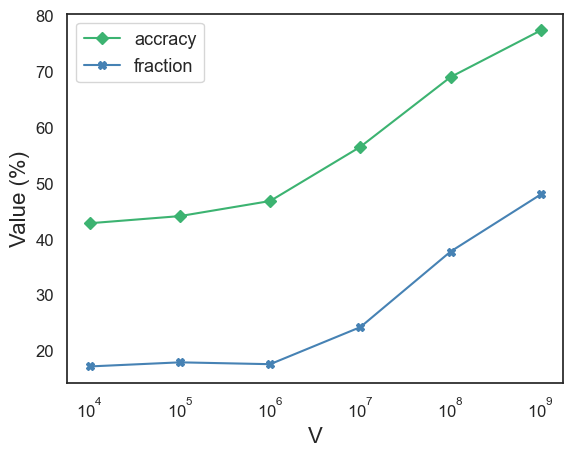

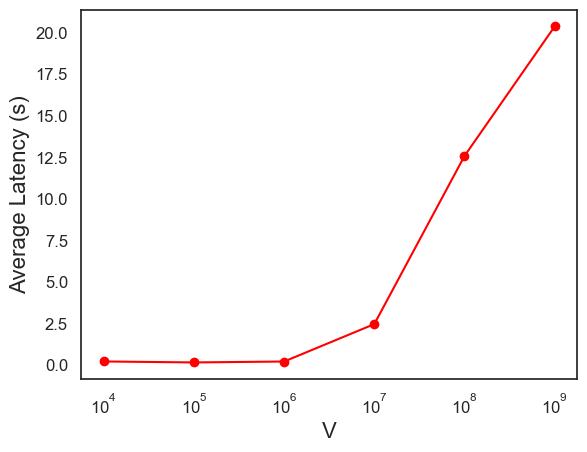

In [276]:
plt.plot(exp_V_df['V'], exp_V_df['accracy'], marker='D', label='accracy', color="mediumseagreen")
plt.plot(exp_V_df['V'], exp_V_df['fraction'], marker='X', label='fraction', color="steelblue")

plt.xlabel('V', fontsize=16)
plt.ylabel('Value (%)', fontsize=16) 
plt.tick_params(labelsize=12) 
plt.legend(fontsize=13)
plt.xscale('log')
#ax2 = plt.gca().twinx()
#ax2.set_ylabel('Fraction') 
#plt.legend()
plt.savefig(SAVE_ROOT+"effect_of_V_performance.pdf",  bbox_inches='tight', pad_inches=0)
idx += 1
plt.show()


plt.plot(exp_V_df['V'], exp_V_df['latency'], marker='o', color="red")

plt.xlabel('V', fontsize=16)
plt.ylabel('Average Latency (s)', fontsize=16) 
plt.tick_params(labelsize=12) 
plt.xscale('log')
plt.savefig(SAVE_ROOT+"effect_of_V_latency.pdf",  bbox_inches='tight', pad_inches=0)
idx += 1
plt.show()


In [265]:
# key_list = ['frameHopper_0.7', 'frameHopper_0.9', 'reducto_0.7', 'reducto_0.9', 'LRLO_1000']
"""
lrlo_list = ['LRLO_1000', 'LRLO_10000', 'LRLO_100000', 'LRLO_1000000', 'LRLO_10000000', 'LRLO_100000000']

for lrlo in lrlo_list:
    key_list = ['frameHopper_0.7', 'reducto_0.7', lrlo]
    columns = ['latency']
    target_data = 'JN'

    for data in dataset:
        if data != target_data:
            continue
        data_df = latency_df[data]
        for column in columns:
            print(column)
            for key, df in data_df.items():
                print(key)
                if key not in key_list:
                    continue
                # x_values = np.arange(0, len(df) * 0.1, 0.1)
                df.reindex(np.arange(0, len(df) * 0.1, 0.1))
                sampled_df = dm.get_sampled_df(df, 1.5)
                #x_values = np.arange(0, len(sampled_df) * 0.1, 0.1)
                #sns.lineplot(x=latency_masking_df.index, y=latency_masking_df[column], alpha=0.5)
                sns.lineplot(x=sampled_df.index, y=sampled_df[column], label=key, lw=width)
                #sns.lineplot(x=latency_unmasking_df.index, y=latency_unmasking_df[column], alpha=0.5)
            print("dataset", data)
            plt.xlabel('times (s)')
            plt.ylabel('latency (s)')
            plt.savefig(SAVE_ROOT+"exp_latency_"+column+".pdf") 
            idx += 1
            plt.show()
"""

'\nlrlo_list = [\'LRLO_1000\', \'LRLO_10000\', \'LRLO_100000\', \'LRLO_1000000\', \'LRLO_10000000\', \'LRLO_100000000\']\n\nfor lrlo in lrlo_list:\n    key_list = [\'frameHopper_0.7\', \'reducto_0.7\', lrlo]\n    columns = [\'latency\']\n    target_data = \'JN\'\n\n    for data in dataset:\n        if data != target_data:\n            continue\n        data_df = latency_df[data]\n        for column in columns:\n            print(column)\n            for key, df in data_df.items():\n                print(key)\n                if key not in key_list:\n                    continue\n                # x_values = np.arange(0, len(df) * 0.1, 0.1)\n                df.reindex(np.arange(0, len(df) * 0.1, 0.1))\n                sampled_df = dm.get_sampled_df(df, 1.5)\n                #x_values = np.arange(0, len(sampled_df) * 0.1, 0.1)\n                #sns.lineplot(x=latency_masking_df.index, y=latency_masking_df[column], alpha=0.5)\n                sns.lineplot(x=sampled_df.index, y=sampled_df[

In [266]:
# key_list = ['frameHopper_0.7', 'reducto_0.7', 'LRLO_100']
"""
lrlo_list = ['LRLO_1000', 'LRLO_10000', 'LRLO_100000', 'LRLO_1000000', 'LRLO_10000000', 'LRLO_100000000']

for lrlo in lrlo_list:
    key_list = ['frameHopper_0.7', 'reducto_0.7', 'frameHopper_0.9', 'reducto_0.9', lrlo]  # 주어진 key_list 수정
    columns = ['latency']
    target_data = ['JK', 'SD', 'JN']

    for data in dataset:
        if data not in target_data:
            continue
        data_df = latency_df[data]
        for column in columns:
            
            box_data = []  # box plot에 사용될 데이터를 저장할 리스트
            
            for key, df in data_df.items():
                if key not in key_list:
                    continue
                sampled_df = dm.get_sampled_df(df, 1.5)
                box_data.append(sampled_df[column].values)  # box plot에 사용될 데이터를 리스트에 추가
            
            if len(box_data) == 5:
                fig, ax = plt.subplots(figsize=(8, 6))  # 그림 크기 지정
                sns.boxplot(data=box_data, ax=ax)
                
                ax.set_xlabel('method')
                ax.set_ylabel('letency (s)')
                
                x_ticks = range(len(key_list))
                ax.set_xticks(x_ticks)
                ax.set_xticklabels(key_list)
                
                print(data, lrlo)
                plt.savefig(SAVE_ROOT + "exp_latency_boxplot_" + column + ".pdf")     
                plt.show()

        # if len(box_data) == 5:
        #     plt.savefig(SAVE_ROOT + "exp_latency_boxplot_" + column + ".pdf")     
        #     plt.show()
"""

'\nlrlo_list = [\'LRLO_1000\', \'LRLO_10000\', \'LRLO_100000\', \'LRLO_1000000\', \'LRLO_10000000\', \'LRLO_100000000\']\n\nfor lrlo in lrlo_list:\n    key_list = [\'frameHopper_0.7\', \'reducto_0.7\', \'frameHopper_0.9\', \'reducto_0.9\', lrlo]  # 주어진 key_list 수정\n    columns = [\'latency\']\n    target_data = [\'JK\', \'SD\', \'JN\']\n\n    for data in dataset:\n        if data not in target_data:\n            continue\n        data_df = latency_df[data]\n        for column in columns:\n            \n            box_data = []  # box plot에 사용될 데이터를 저장할 리스트\n            \n            for key, df in data_df.items():\n                if key not in key_list:\n                    continue\n                sampled_df = dm.get_sampled_df(df, 1.5)\n                box_data.append(sampled_df[column].values)  # box plot에 사용될 데이터를 리스트에 추가\n            \n            if len(box_data) == 5:\n                fig, ax = plt.subplots(figsize=(8, 6))  # 그림 크기 지정\n                sns.boxplot(data=box_dat

dataset JK


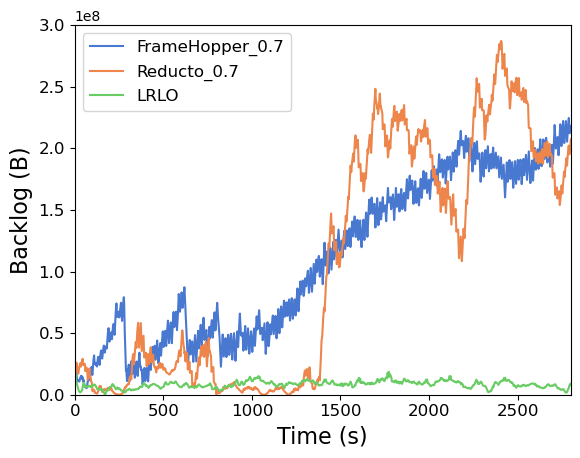

dataset JK


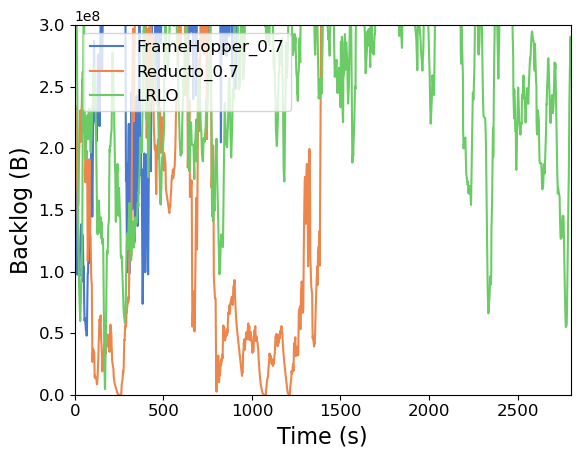

In [28]:
# key_list = ['frameHopper_0.7', 'frameHopper_0.9', 'reducto_0.7', 'reducto_0.9', 'LRLO_1000']
#lrlo_list = ['LRLO_1000', 'LRLO_10000', 'LRLO_100000', 'LRLO_1000000', 'LRLO_10000000', 'LRLO_100000000']
#for lrlo in lrlo_list:
#    print(lrlo)
key_list = ['FrameHopper_0.7', 'Reducto_0.7', "LRLO_1000000"]
columns = ['avg', 'sum']
target_data = 'JK'
sns.set_palette("muted")
for data in dataset:
    if data != target_data:
        continue
    data_df = backlog_df[data]
    for column in columns:
        #print(column)
        flag = True
        for key, df in data_df.items():
            #print(data_df.keys())
            if key_list[-1] not in data_df.keys():
                flag = False
                break
            #print(key)
            if key not in key_list:
                continue
            # x_values = np.arange(0, len(df) * 0.1, 0.1)
            df.reindex(np.arange(0, len(df) * 0.1, 0.1))
            sampled_df = dm.get_sampled_df(df, 10)
            #x_values = np.arange(0, len(sampled_df) * 0.1, 0.1)
            #sns.lineplot(x=latency_masking_df.index, y=latency_masking_df[column], alpha=0.5)
            if key[0] == 'L':
                key = "LRLO"
            sns.lineplot(x=sampled_df.index, y=sampled_df[column], label=key, lw=1.5, palette="Muted")
            #sns.lineplot(x=latency_unmasking_df.index, y=latency_unmasking_df[column], alpha=0.5)
        if flag:
            print("dataset", data)
            plt.xlim(0, 2800)
            plt.ylim(0, 300000000)
            plt.xlabel('Time (s)', fontsize=16)  
            plt.ylabel('Backlog (B)', fontsize=16) 
            plt.tick_params(labelsize=12) 
            plt.legend(loc='upper left', fontsize=12) 
            plt.savefig(SAVE_ROOT+"exp_backlog_"+column+".pdf") 
            idx += 1
            plt.show()


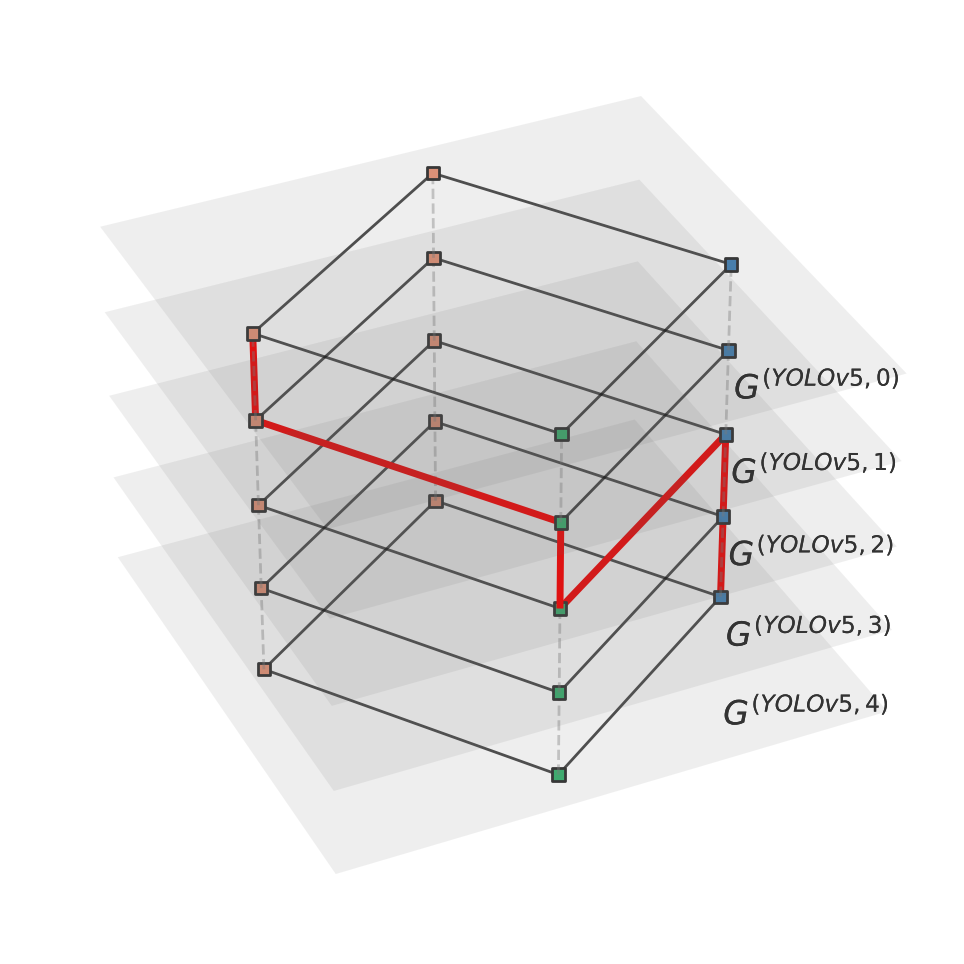

In [281]:
from matplotlib.patches import FancyBboxPatch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d.art3d import Line3DCollection
%matplotlib inline
# let's start with the important stuff. pick your colors.
cols = ['steelblue', 'darksalmon', 'mediumseagreen', 'darksalmon', 'mediumseagreen', 'gray', 'black']
np.random.seed(1)

graphs = []
for i in range(5):
    G = nx.Graph()
    G.add_node(1, color='darksalmon')
    G.add_node(2, color='darksalmon')
    G.add_node(3, color='mediumseagreen')
    G.add_node(4, color='steelblue')
    G.add_edge(1, 2)
    G.add_edge(1, 3)
    G.add_edge(2, 4)
    G.add_edge(3, 4)
    pos = nx.spring_layout(G) # assuming common node location
    graphs.append(G)

w = 8
h = 6

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200, subplot_kw={'projection':'3d'})

for gi, G in enumerate(graphs):
    # node positions
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = ['darksalmon', 'darksalmon', 'mediumseagreen', 'steelblue']
    
    # if you want to have between-layer connections
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),4,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.4, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)
        
        #! 특정한 between line을 빨간색으로 추가
        if gi == 4:
            nodes = list(G.nodes())
            red_between_line = [(list(pos[nodes[0]])+[gi-1],list(pos[nodes[0]])+[gi])]
            red_between_line_collection = Line3DCollection(red_between_line, zorder=gi, color='red',
                                                            alpha=1.0, linewidth=2.5)
            ax.add_collection3d(red_between_line_collection)
            
        elif gi >= 3:  # 예를 들어, 세 번째 층의 between line 중 하나를 빨간색으로 설정하려면 조건을 설정합니다.
            nodes = list(G.nodes())
            red_between_line = [(list(pos[nodes[2]])+[gi-1],list(pos[nodes[2]])+[gi])]
            red_between_line_collection = Line3DCollection(red_between_line, zorder=gi, color='red',
                                                            alpha=1.0, linewidth=2.5)
            ax.add_collection3d(red_between_line_collection)
        
        if gi < 3:
            nodes = list(G.nodes())
            red_between_line = [(list(pos[nodes[3]])+[gi-1],list(pos[nodes[3]])+[gi])]
            red_between_line_collection = Line3DCollection(red_between_line, zorder=gi, color='red',
                                                            alpha=1.0, linewidth=2.5)
            ax.add_collection3d(red_between_line_collection)

    # add within-layer edges 
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi, color=cols[6], alpha=0.7, linewidth=1.0)
    ax.add_collection3d(line_collection)
    
    #! 특정 엣지에 빨간색 화살표 추가
    if gi == 3:  # 예를 들어, 세 번째 층의 엣지에만 빨간색 화살표를 추가하려면 조건을 설정합니다.
        red_edges = [(1, 3)]  # 빨간색으로 표시할 엣지의 리스트를 지정합니다.
        red_lines3d = [(list(pos[i])+[gi], list(pos[j])+[gi]) for i, j in red_edges]
        red_line_collection = Line3DCollection(red_lines3d, zorder=gi+1, color='red', alpha=1.0, linewidth=2.5)
        ax.add_collection3d(red_line_collection)
    
    if gi == 2:
        red_edges = [(3, 4)]  # 빨간색으로 표시할 엣지의 리스트를 지정합니다.
        red_lines3d = [(list(pos[i])+[gi], list(pos[j])+[gi]) for i, j in red_edges]
        red_line_collection = Line3DCollection(red_lines3d, zorder=gi+1, color='red', alpha=1.0, linewidth=2.5)
        ax.add_collection3d(red_line_collection)
        
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, edgecolors='.2', marker='s', alpha=1, zorder=gi+1)
    
    
    
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[5], alpha=0.1, zorder=gi, edgecolor='none')

    # add label

    layertext = ax.text(-0.5, 1.15, gi*0.95+0.5, r"$G^{(YOLOv5, %i)}$" % (4-gi),
                        color='.2', fontsize='medium', zorder=1e5, ha='left', va='center',
                        path_effects=[path_effects.Stroke(linewidth=0, foreground=cols[gi]),
                                      path_effects.Normal()])
    
    # #! backlog 표현 추가
    # if gi == 4:  # 예를 들어, 세 번째 층의 엣지에만 빨간색 화살표를 추가하려면 조건을 설정합니다.
    #     # 특정 엣지 위에 값을 표시합니다.
    #     edge_midpoint = (pos[1][0]-0.8, pos[1][1]-0.8, gi)  # 엣지의 중간 지점 계산
    #     bbox_props = dict(boxstyle="square,pad=0.1", fc="white", ec="black", lw=1.1)  # 네모난 상자 속성 설정
    #     ax.text(edge_midpoint[0], edge_midpoint[1], edge_midpoint[2] , '■■', color='darksalmon', fontsize=12, ha='center', va='center', zorder=gi+2, bbox=bbox_props)
        
    #     edge_midpoint = (pos[1][0]-0.5, pos[1][1]+0.8, gi)  # 엣지의 중간 지점 계산
    #     bbox_props = dict(boxstyle="square,pad=0.1", fc="white", ec="black", lw=1.1)  # 네모난 상자 속성 설정
    #     ax.text(edge_midpoint[0], edge_midpoint[1], edge_midpoint[2] , '■■', color='green', fontsize=12, ha='center', va='center', zorder=gi+2, bbox=bbox_props)
        
    #     edge_midpoint = (pos[1][0]+0.5, pos[1][1]+0.5, gi)  # 엣지의 중간 지점 계산
    #     bbox_props = dict(boxstyle="square,pad=0.1", fc="white", ec="black", lw=1.1)  # 네모난 상자 속성 설정
    #     ax.text(edge_midpoint[0], edge_midpoint[1], edge_midpoint[2] , '■■', color='darksalmon', fontsize=12, ha='center', va='center', zorder=gi+2, bbox=bbox_props)

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 65
height_angle = 35
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 8.5
ax.set_axis_off()

plt.savefig('multilayer_network_case1.svg', bbox_inches='tight')
plt.show()

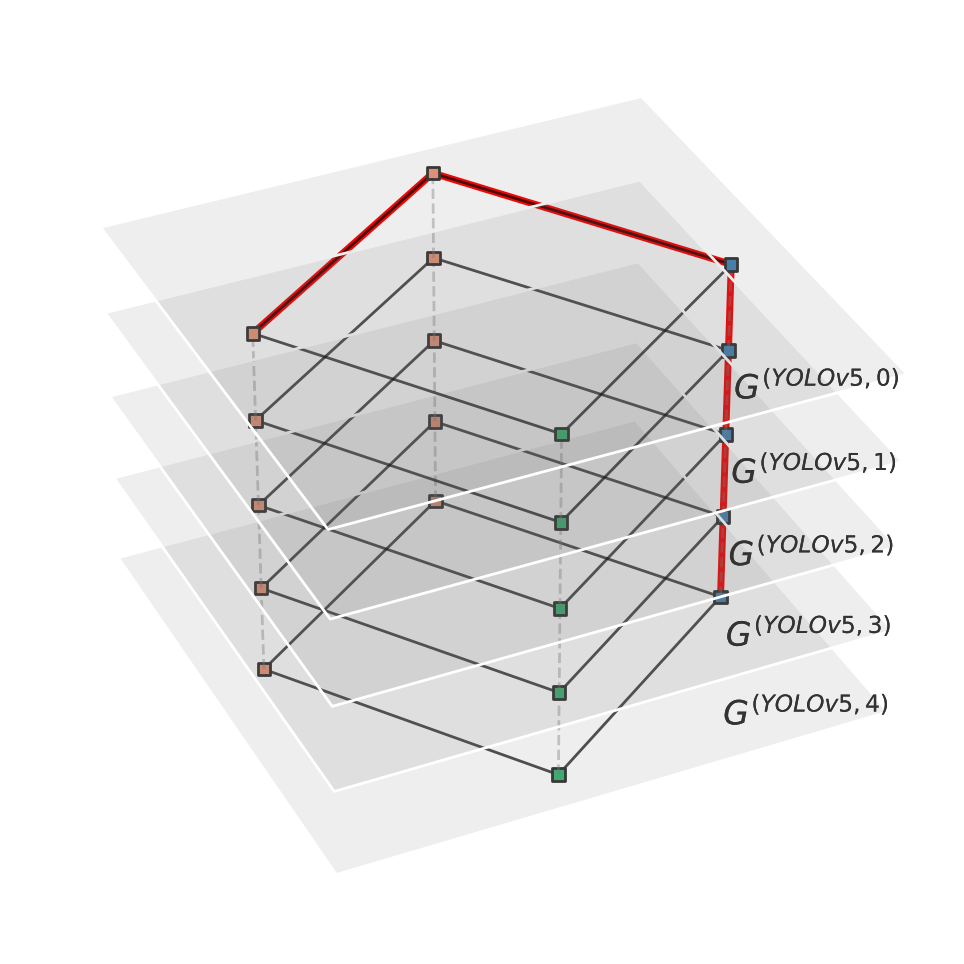

In [269]:
from matplotlib.patches import FancyBboxPatch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d.art3d import Line3DCollection
%matplotlib inline
# let's start with the important stuff. pick your colors.
cols = ['steelblue', 'darksalmon', 'mediumseagreen', 'darksalmon', 'mediumseagreen', 'gray', 'black']
np.random.seed(1)

graphs = []
for i in range(5):
    G = nx.Graph()
    G.add_node(1, color='darksalmon')
    G.add_node(2, color='darksalmon')
    G.add_node(3, color='mediumseagreen')
    G.add_node(4, color='steelblue')
    G.add_edge(1, 2)
    G.add_edge(1, 3)
    G.add_edge(2, 4)
    G.add_edge(3, 4)
    pos = nx.spring_layout(G) # assuming common node location
    graphs.append(G)

w = 8
h = 6

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200, subplot_kw={'projection':'3d'})

for gi, G in enumerate(graphs):
    # node positions
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = ['darksalmon', 'darksalmon', 'mediumseagreen', 'steelblue']
    
    # if you want to have between-layer connections
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),4,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.4, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)
        
        #! 특정한 between line을 빨간색으로 추가
        if gi > 0:  # 예를 들어, 세 번째 층의 between line 중 하나를 빨간색으로 설정하려면 조건을 설정합니다.
            nodes = list(G.nodes())
            red_between_line = [(list(pos[nodes[3]])+[gi-1],list(pos[nodes[3]])+[gi])]
            red_between_line_collection = Line3DCollection(red_between_line, zorder=gi, color='red',
                                                            alpha=1.0, linewidth=2.5)
            ax.add_collection3d(red_between_line_collection)

    # add within-layer edges 
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi, color=cols[6], alpha=0.7, linewidth=1.0)
    ax.add_collection3d(line_collection)
    
    #! 특정 엣지에 빨간색 화살표 추가
    if gi == 4:  # 예를 들어, 세 번째 층의 엣지에만 빨간색 화살표를 추가하려면 조건을 설정합니다.
        red_edges = [(1, 2), (2, 4)]  # 빨간색으로 표시할 엣지의 리스트를 지정합니다.
        red_lines3d = [(list(pos[i])+[gi], list(pos[j])+[gi]) for i, j in red_edges]
        red_line_collection = Line3DCollection(red_lines3d, zorder=gi+1, color='red', alpha=1.0, linewidth=2.5)
        ax.add_collection3d(red_line_collection)
        
        
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, edgecolors='.2', marker='s', alpha=1, zorder=gi+1)
    
    
    
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[5], alpha=0.1, zorder=gi)

    # add label

    layertext = ax.text(-0.5, 1.15, gi*0.95+0.5, r"$G^{(YOLOv5, %i)}$" % (4-gi),
                        color='.2', fontsize='medium', zorder=1e5, ha='left', va='center',
                        path_effects=[path_effects.Stroke(linewidth=0, foreground=cols[gi]),
                                      path_effects.Normal()])
    
    # #! backlog 표현 추가
    # if gi == 4:  # 예를 들어, 세 번째 층의 엣지에만 빨간색 화살표를 추가하려면 조건을 설정합니다.
    #     # 특정 엣지 위에 값을 표시합니다.
    #     edge_midpoint = (pos[1][0]-0.8, pos[1][1]-0.8, gi)  # 엣지의 중간 지점 계산
    #     bbox_props = dict(boxstyle="square,pad=0.1", fc="white", ec="black", lw=1.1)  # 네모난 상자 속성 설정
    #     ax.text(edge_midpoint[0], edge_midpoint[1], edge_midpoint[2] , '■■', color='darksalmon', fontsize=12, ha='center', va='center', zorder=gi+2, bbox=bbox_props)
        
    #     edge_midpoint = (pos[1][0]-0.5, pos[1][1]+0.8, gi)  # 엣지의 중간 지점 계산
    #     bbox_props = dict(boxstyle="square,pad=0.1", fc="white", ec="black", lw=1.1)  # 네모난 상자 속성 설정
    #     ax.text(edge_midpoint[0], edge_midpoint[1], edge_midpoint[2] , '■■', color='green', fontsize=12, ha='center', va='center', zorder=gi+2, bbox=bbox_props)
        
    #     edge_midpoint = (pos[1][0]+0.5, pos[1][1]+0.5, gi)  # 엣지의 중간 지점 계산
    #     bbox_props = dict(boxstyle="square,pad=0.1", fc="white", ec="black", lw=1.1)  # 네모난 상자 속성 설정
    #     ax.text(edge_midpoint[0], edge_midpoint[1], edge_midpoint[2] , '■■', color='darksalmon', fontsize=12, ha='center', va='center', zorder=gi+2, bbox=bbox_props)

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 65
height_angle = 35
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 8.5
#ax.grid_off()
ax.set_axis_off()

#plt.savefig('multilayer_network_case2.svg', bbox_inches='tight')
plt.show()